# Aproksymacja liniowa

***Zadanie 1.***

Zdefiniuj funkcję liniową z dowolnymi paramterami $a,b$. Przeprowadź symulację zaszumionego próbkowania jej wartości z przedziału [0,50]. Wykreśl funkcję wraz z jej zaszumionymi próbkami, a następnie dokonaj aproskymacji swojej funkcji za pomocą:
* funkcji liniowej,
* funkcji kwadratowej,
* wielomianu trzeciego stopnia.

Zastosuj metodę/metody minimalizujące najmniejszych kwadratów (normę średniokwadratową np. funkcję *curve_fit* z [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)).

Porównaj otrzymane wyniki z metodami interpolacji poznanymi na poprzednich zajęciach. W tym celu przeprowadź interpolację wygenerowanych danych za pomocą wielomianu interpolacyjnego Lagrange'a oraz za pomocą funkcji sklejanych.

*Wskazówka*: Najpierw wygerneruj tablicę 100 wartości $(x_i, f(x_i))$ dla $x_i \in [0,50]$. Następnie za pomocą np. funkcji *np.random.normal* wygeneruj 100-elementową tablicę szumu losowego i dodaj ją do wygenerowanych **wartości** funkcji (tj. do $f(x_i)$).

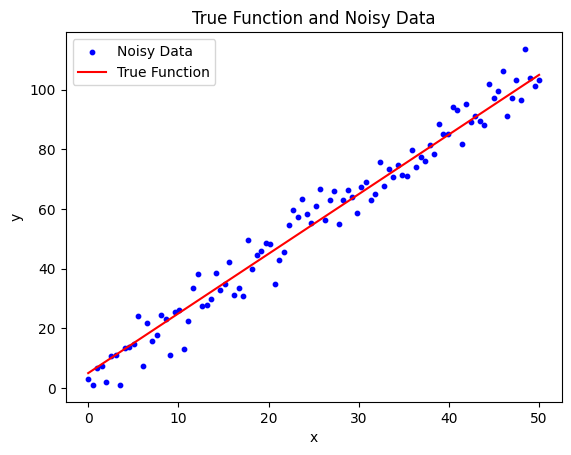

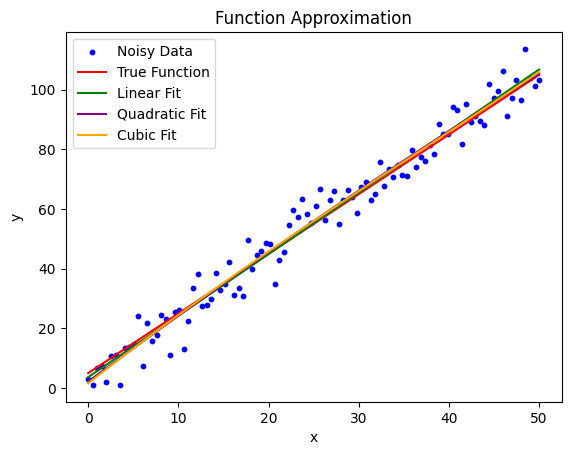

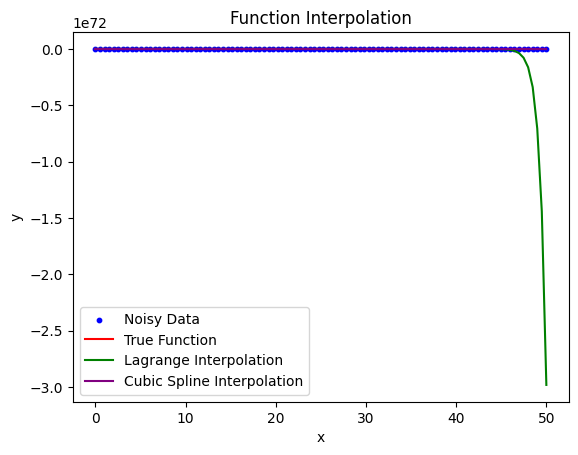

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import lagrange, CubicSpline


def linear_function(x, a, b):
    return a * x + b

a = 2
b = 5

x = np.linspace(0, 50, 100)


y = linear_function(x, a, b)
noise = np.random.normal(0, 5, x.shape)
y_noisy = y + noise

plt.scatter(x, y_noisy, label='Noisy Data', color='blue', s=10)
plt.plot(x, y, label='True Function', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('True Function and Noisy Data')
plt.show()

params_linear, _ = curve_fit(linear_function, x, y_noisy)


def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c


params_quadratic, _ = curve_fit(quadratic_function, x, y_noisy)


def cubic_function(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d


params_cubic, _ = curve_fit(cubic_function, x, y_noisy)


y_pred_linear = linear_function(x, *params_linear)
y_pred_quadratic = quadratic_function(x, *params_quadratic)
y_pred_cubic = cubic_function(x, *params_cubic)

plt.scatter(x, y_noisy, label='Noisy Data', color='blue', s=10)
plt.plot(x, y, label='True Function', color='red')
plt.plot(x, y_pred_linear, label='Linear Fit', color='green')
plt.plot(x, y_pred_quadratic, label='Quadratic Fit', color='purple')
plt.plot(x, y_pred_cubic, label='Cubic Fit', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Function Approximation')
plt.show()

poly_lagrange = lagrange(x, y_noisy)


spline = CubicSpline(x, y_noisy)


y_pred_lagrange = poly_lagrange(x)
y_pred_spline = spline(x)


plt.scatter(x, y_noisy, label='Noisy Data', color='blue', s=10)
plt.plot(x, y, label='True Function', color='red')
plt.plot(x, y_pred_lagrange, label='Lagrange Interpolation', color='green')
plt.plot(x, y_pred_spline, label='Cubic Spline Interpolation', color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Function Interpolation')
plt.show()

***Zadanie 2.***


Wykorzystaj metody aproksymacji do rozwiązania zadania z kierowcą z poprzednich ćwiczeń.


Kierowca jadący z miasta A do miasta B, zauważywszy na drodze fotoradar, zaczął gwałtownie hamować. Przebieg jego położenia, zarejestrowany przez nawigację, pokazano w poniższej tabeli. Wiedząc, że radar znajduje się w punkcie o współrzędnej 79.6 m, oszacuj kiedy kierowca minął fotoradar (w tym celu skorzystaj z jednej z metod z laboratorium 3) oraz z jaką prędkością wtedy jechał (wykorzystaj relację drogi i prędkości znaną z fizyki). 

|czas \[s\]|położenie \[m\]|
|--|--|
|0.0|0.0|
|1.0|42.7|
|2.0|73.2|
|3.0|92.5|

C:\Users\Michal\AppData\Local\Temp\ipykernel_5980\1767398356.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_cubic, _ = curve_fit(cubic_function, time, position)


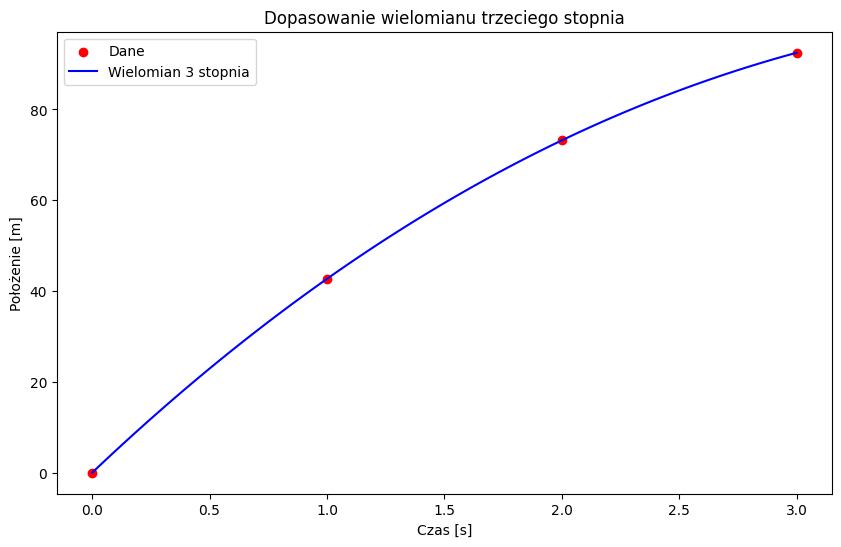

Kierowca minął fotoradar po 2.28 sekundach.
Prędkość kierowcy w momencie minienia fotoradaru wynosiła 21.68 m/s.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, fsolve

# Dane z tabeli
time = np.array([0.0, 1.0, 2.0, 3.0])
position = np.array([0.0, 42.7, 73.2, 92.5])


def cubic_function(t, a, b, c, d):
    return a*t**3 + b*t**2 + c*t + d

popt_cubic, _ = curve_fit(cubic_function, time, position)


a, b, c, d = popt_cubic


t_fine = np.linspace(0, 3, 100)
pos_fine = cubic_function(t_fine, a, b, c, d)

plt.figure(figsize=(10, 6))
plt.scatter(time, position, label='Dane', color='red')
plt.plot(t_fine, pos_fine, label='Wielomian 3 stopnia', color='blue')
plt.xlabel('Czas [s]')
plt.ylabel('Położenie [m]')
plt.title('Dopasowanie wielomianu trzeciego stopnia')
plt.legend()
plt.show()


def equation(t):
    return cubic_function(t, a, b, c, d) - 79.6


time_at_radar = fsolve(equation, 2.0)[0]  

def cubic_derivative(t, a, b, c):
    return 3*a*t**2 + 2*b*t + c

velocity_at_radar = cubic_derivative(time_at_radar, a, b, c)

print(f"Kierowca minął fotoradar po {time_at_radar:.2f} sekundach.")
print(f"Prędkość kierowcy w momencie minienia fotoradaru wynosiła {velocity_at_radar:.2f} m/s.")


***Zadanie 3.***


Spróbuj przeprowadzić regresję liniową (aproksymację funkcją liniową) na rzeczywistych danych (np. z repozytorium [UCI](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)). Wykorzystaj stworzony model do predykcji. Dla ułatwienia możesz zastosować funkcję z biblioteki [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name='MEDV')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())
